In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import statistics
import sys
import os

In [2]:
def batch_gen():
    with open(file_path) as f:
        for index, line in enumerate(f):
            yield index, line

In [3]:
def correct_timestep(ti):
    new_ti = list()
    for i in range(0, len(ti)):
        new_ti.append(ti[i] - (9*i))
    return new_ti

In [4]:
def min_ip(inflection_points):
    remove_list = list()
    for ip in range(0, len(inflection_points)):
        if inflection_points[ip] < 0:
            remove_list.append(ip)
    if not remove_list:
        ip_pos = inflection_points
    else:
        remove_arr = np.asarray(remove_list)
        ip_pos = np.delete(inflection_points, remove_arr)
    return min(ip_pos)

In [5]:
def find_values(x_data, ip):
    index = (np.abs(x_data-ip)).argmin()
    return np.unique(x_data[index])

In [6]:
def find_index(x_data, ip):
    index = (np.abs(x_data-ip)).argmin()
    return index

In [7]:
def make_array(array):
    new_list = list()
    for arr_sel in range(0, len(array)):
        new_list.append(array[arr_sel])
    new_arr = np.asarray(new_list)
    return new_arr

In [8]:
def return_slope(x, y):
    m = (((statistics.mean(x)*statistics.mean(y)) - statistics.mean(x*y))/((statistics.mean(x)*statistics.mean(x)) - statistics.mean(x*x)))
    return m

In [9]:
def temp_gen():
    for i in range(0, 8):
        for temp in temp_bin_arr[:, i]:
            yield temp

In [10]:
def pos_gen():
    for i in range(0, 8):
        for x in x_bin_arr[:, i]:
            yield x

In [11]:
def exponential(x_data, a, b, c):
    return a*np.exp(x_data*b) + c

In [12]:
def solve_x_exp(parameters, y):
    return (np.log((y - parameters[2])/parameters[0]))/parameters[1]

In [13]:
while True:
    try:
        n_bins = int(input('Enter number of bins: '))
    except ValueError:
        print('Enter a positive whole number')
    if n_bins <= 0:
        print('Enter a positive whole number')
        continue
    else:
        break

Enter number of bins: 250


In [14]:
folder_path = r'C:/Users/krist/Research/50-50'
file = 'dump.baras_reaction_8.79nm_1.34'
file_path = os.path.join(folder_path, file)

In [15]:
timestep_index = list()
x_data = list()
y_data = list()
z_data = list()
c_ke = list()
skip = 0
x = 0

instance = batch_gen()
while True:
    try:
        content = [next(instance) for i in range(0, 100)]
    except:
        break
    for line in range(0, len(content)):
        if skip != 0:
            skip = skip - 1
            continue
        if 'TIMESTEP' in str(content[line][1]):
            timestep_index.append(content[line][0])
            skip = 1
            continue
        elif 'NUMBER OF ATOMS' in str(content[line][1]):
            skip = 1
            continue
        elif 'BOX BOUNDS' in str(content[line][1]):
            skip = 3
            continue
        elif 'ITEM: ATOMS' in str(content[line][1]):
            continue
        else:
            data_strip = content[line][1].strip('\n')
            cat_split = data_strip.split()
            x_data.append(float(cat_split[2]))
            #y_data.append(float(cat_split[3]))
            #z_data.append(float(cat_split[4]))
            c_ke.append(float(cat_split[5]))
            content.append(data_strip)

In [16]:
correct_ti = correct_timestep(timestep_index)

In [17]:
min_x = list()
max_x = list()
for i in range(0, len(correct_ti)):
    if i == len(correct_ti) - 1:
        min_x.append(min(x_data[correct_ti[i]:]))
        max_x.append(max(x_data[correct_ti[i]:]))
    else:
        min_x.append(min(x_data[correct_ti[i]:correct_ti[i+1]]))
        max_x.append(max(x_data[correct_ti[i]:correct_ti[i+1]]))

In [18]:
x_arr = np.asarray(x_data)
temp_arr = np.asarray(c_ke)
data_arr = np.column_stack((x_arr, c_ke))

In [19]:
x_bin_arr = np.zeros((n_bins, 8), dtype = float)
temp_bin_arr = np.zeros((n_bins, 8), dtype = float)
final_values = list()
x_select_list = list()
temp_select_list = list()
time = list()
row = -1

for i in range(5, 20, 2): #len(correct_ti)):  or range(5, 20, 2)
    row = row + 1
    time.append(i*0.2)
    total_length = max_x[i] - min_x[i]
    bin_length = total_length/n_bins
    correct_data_arr = data_arr[correct_ti[i]:correct_ti[i+1]]
    data_sort_arr = correct_data_arr[correct_data_arr[:, 0].argsort()]
    for binning in range(0, n_bins):
        high = find_index(data_sort_arr[:, 0], (binning + 1)*bin_length + min_x[i])
        low = find_index(data_sort_arr[:, 0], (binning*bin_length) + min_x[i])
        for select_points in data_sort_arr[low:high]:
            x_select_list.append(select_points[0])
            temp_select_list.append(select_points[1])
        
        avg_x = statistics.mean(x_select_list)
        avg_temp = statistics.mean(temp_select_list)
        x_bin_arr[binning, row] = avg_x
        temp_bin_arr[binning, row] = avg_temp
        x_select_list.clear()
        temp_select_list.clear()

time_arr = np.asarray(time)

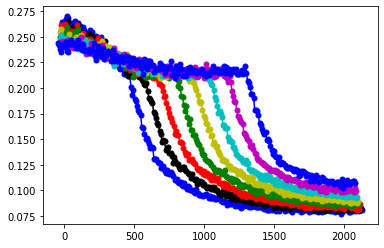

In [20]:
for plot_row in range(0, 8):
    plt.plot(x_bin_arr[:, plot_row], temp_bin_arr[:, plot_row], marker = 'o', ms = 5, color = "bkrgycmbkrgycmbkrgycm"[plot_row])

0
[54, 55, 56, 59, 62, 63, 64, 65]
1
[69, 70, 74, 75, 79]
2
[85, 86]
3
[98, 99, 102, 104]
4
[111, 112, 116, 117]
5
[126, 127, 128]
6
[141, 142, 143, 144, 145, 146, 147]


C:\Users\krist\Miniconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


7
[156, 157, 160, 161, 162, 165, 166]


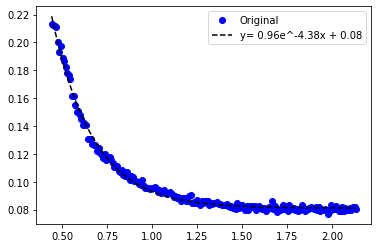

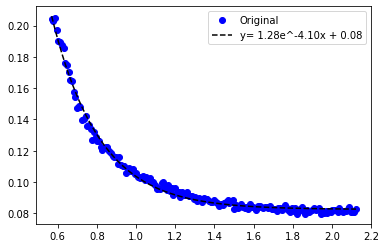

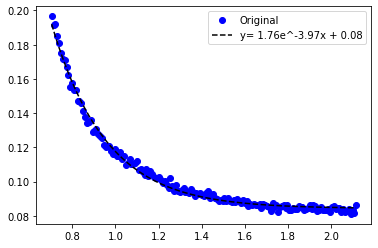

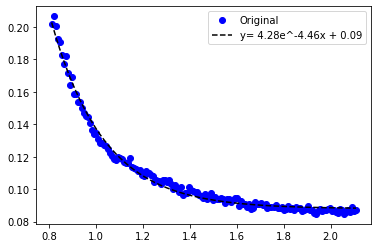

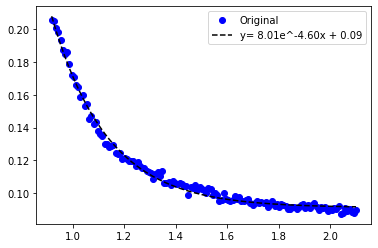

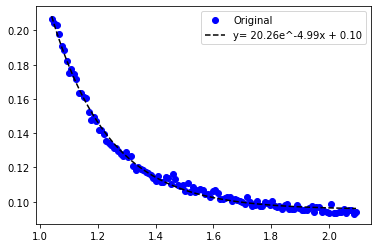

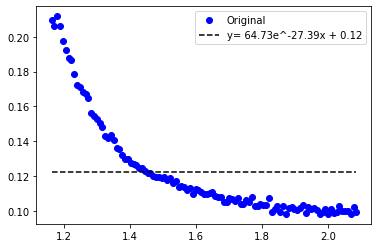

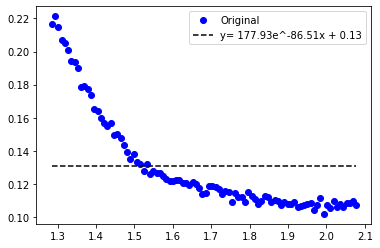

In [27]:
test_arr = np.zeros((170, 8), dtype = float)
#chosen_temps = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]
chosen_temps = [x for x in range(850, 1700, 5)]
possible_choices = list()
instance2 = temp_gen()
instance3 = pos_gen()
next(instance2)
next(instance3)
load = 0

for col_sel in range(0, 8):  # Change 8 to input (along with initialization for temp_bin_arr and x_bin_arr)
    for start in range(0, len(temp_bin_arr[:, col_sel])):
        try:
            if load == 0:
                temp_content2 = next(instance2)
                temp_content3 = next(instance2)
                temp_content4 = next(instance2)
                temp_content5 = next(instance2)
                temp_content6 = next(instance2)
                x_content2 = next(instance3)
                x_content3 = next(instance3)
                x_content4 = next(instance3)
                x_content5 = next(instance3)
                x_content6 = next(instance3)
                temp_slope_arr = np.array([temp_content2, temp_content3, temp_content4, temp_content5, temp_content6])
                x_slope_arr = np.array([x_content2, x_content3, x_content4, x_content5, x_content6])
                load += 1
            else:
                temp_content2 = temp_content3
                temp_content3 = temp_content4
                temp_content4 = temp_content5
                temp_content5 = temp_content6
                x_content2 = x_content3
                x_content3 = x_content4
                x_content4 = x_content5
                x_content5 = x_content6
                temp_content6 = next(instance2)
                x_content6 = next(instance3)
                temp_slope_arr = np.array([temp_content2, temp_content3, temp_content4, temp_content5, temp_content6])
                x_slope_arr = np.array([x_content2, x_content3, x_content4, x_content5, x_content6])
        except:
            break
        if return_slope(x_slope_arr, temp_slope_arr) < -0.00047822137: # 2 K per angstrom
            possible_choices.append(start)
        else:
            continue
    print(col_sel)
    print(possible_choices)
    parameters, covar = curve_fit(exponential, x_bin_arr[possible_choices[0]:, col_sel]/1000, temp_bin_arr[possible_choices[0]:, col_sel], p0 = [1, -5, 0])
    error = np.sqrt(np.diag(covar))
    plt.figure(col_sel + 1)
    plt.plot(x_bin_arr[possible_choices[0]:, col_sel]/1000, temp_bin_arr[possible_choices[0]:, col_sel], 'ob',
    x_bin_arr[possible_choices[0]:, col_sel]/1000, exponential(x_bin_arr[possible_choices[0]:, col_sel]/1000, *parameters), 'k--')
    plt.legend(('Original','y= {:.2f}e^{:.2f}x + {:.2f}'.format(parameters[0], parameters[1], parameters[2])))
    for row_sel in range(0, len(chosen_temps)):
        curr_temp = (chosen_temps[row_sel]/11604.5250061657)*(3/2)
        curr_pos = solve_x_exp(parameters, curr_temp)
        test_arr[row_sel, col_sel] = curr_pos*1000
    possible_choices.clear()

322.81478650692526
321.1197377092369
319.54279546071535
318.0728045431565
316.6999790960195
315.4156955174445
314.21232246606996
313.08308031655145
312.0219241954457
311.02344604279216
310.08279213579067
309.19559326313566
308.35790531488647
307.56615849805866
306.81711373507034
306.1078250744659
305.4356071586581
304.79800696469505
304.19277917132206
303.6178646160643
303.07137139567584
302.5515582361578
302.0568198182862
301.58567379365417
301.13674926682387
300.708776552803
300.30057804715
299.9110600694237
299.5392055604185
299.1840675302127
298.8447631680922
298.5204685373145
298.2104137878143
297.9138788285915
297.630189408945
297.3587135640432
297.0988583858299
296.8500670849496
296.6118163134993
296.383613721923
296.16499572648075
295.95552546637504
295.75479093199704
295.5624032477711
295.37799509490594
295.20121926092355
295.03174730423024
294.86926832323087
294.7134878205594
294.5641266539668
294.42092006625535
294.28361678740356
294.1519782026971
294.02577758128143
293.9047

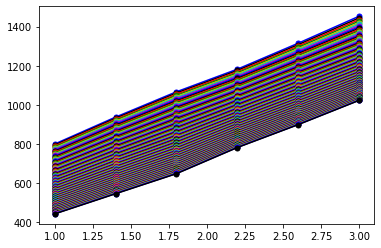

In [30]:
time_list = [1.0, 1.4, 1.8, 2.2, 2.6, 3]#, 3.4, 3.8]
time_arr = make_array(time_list)
velocity_list = list()

for row in range(0, len(chosen_temps)):
    m = return_slope(time_arr, test_arr[row, :6])
    velocity_list.append(m)
    #print('The velocity in angstroms per nanosecond is: {}'.format(m))
    print(m)
    plt.plot(time_list, test_arr[row, :6], marker = 'o', ms = 5, color = 'bkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmbkrgycmvv'[row])

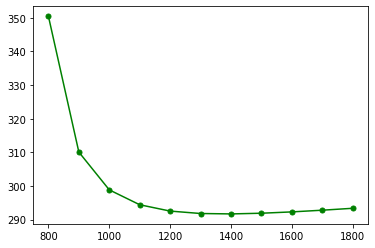

In [23]:
plt.plot(chosen_temps, velocity_list, marker = 'o', ms = 5, color = 'bkrgycmbkrgycmbkrgycm'[row])